# Problem001 : Periodic signal

An instrument is used to measure a periodic signal (period = 1s). A record of 1000 measurements is found in the file `data.csv`, where each row contains information about the time of the measurment and the value of the measured signal.

1. Read the data, and plot the signal (f) as a function of time
2. Use `numpy` to compute the Fourier transform (F) of the signal
3. Plot the absolute value of F as a function of frequency
4. List all frequencies for which the absolute value of F is larger than $10\%$ of its maximum value
5. Copy `F` into a new array (`F_new`) and suppress (set to zero) all components of `F_new` that are not in the list developed at step 4. 
6. Plot the initial signal (`f`) and the smooth new signal (`f_new`), obtained as the inverse Fourier transform of `F_new`. Both `f` and `f_new` are functions of time.

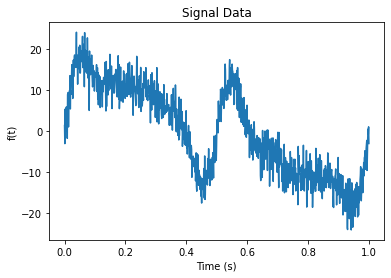

In [6]:
import numpy as np
import csv
from matplotlib import pyplot as plt

#PART 1: READ DATA, PLOT SIGNAL

with open('data.csv') as data:
    csv_reader = csv.reader(data, delimiter=',')
    lst_data = list(csv_reader)
    data = np.asarray(lst_data,dtype='f8').T

f = data[1]
time_data = data[0]

plt.title("Signal Data")
plt.xlabel("Time (s)")
plt.ylabel("f(t)")
plt.plot(time_data,f)
plt.show()

In [7]:
#PART 2: FOURIER TRANSFORM

N = 1000
d = 1/N
freq = np.fft.fftfreq(N,d)
F = np.fft.fft(f)

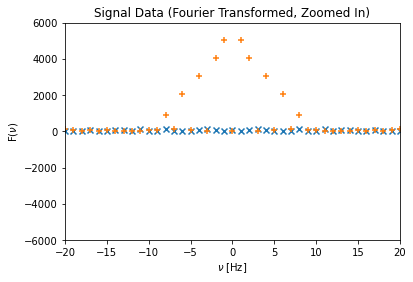

In [9]:
#PART 3: PLOT ABS OF F AS FUNCTION OF FREQ

plt.title("Signal Data (Fourier Transformed, Zoomed In)")
plt.xlabel(r"$\nu$ [Hz]")
plt.ylabel(r"F($\nu$)")
plt.axis([-20,20,-6000,6000])
plt.scatter(freq,np.abs(F.real),label="Real",marker="x")
plt.scatter(freq,np.abs(F.imag),label="Imaginary",marker="+")
plt.show()

In [10]:
#PART 4: FIND FREQ WHERE F > 0.1*MAX(F)

idx_of_interest = np.where(np.abs(F)>0.1*np.max(np.abs(F)))[0]
print("Components with absolute F is greater than 10% of Maximum F are:\n[index] : [data]")
for i in idx_of_interest:
    print(f"{i} : {F[i]}")

Components with absolute F is greater than 10% of Maximum F are:
[index] : [data]
1 : (8.638885224025472-5033.964462080546j)
2 : (-82.59222868823267-4055.069289420165j)
4 : (47.75325799472097-3053.8662120089093j)
6 : (26.52292354246294-2056.675166599472j)
8 : (-103.21231133745766-919.0898952500795j)
992 : (-103.21231133745765+919.0898952500795j)
994 : (26.522923542462916+2056.6751665994725j)
996 : (47.75325799472097+3053.8662120089093j)
998 : (-82.59222868823267+4055.0692894201648j)
999 : (8.638885224025408+5033.964462080547j)


In [11]:
#PART 5: SURRPRESSED ARRAY

F_new = np.array([F[i] if i in idx_of_interest else 0 for i in range(len(F))])

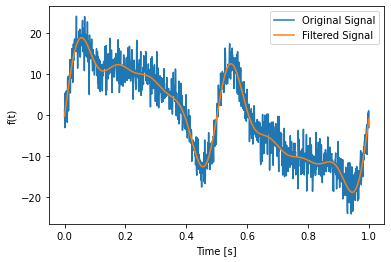

In [12]:
#PART 6: INVERSE FILTERED FOURIER PLOTS

f_new = np.fft.ifft(F_new)

plt.plot(time_data,f,label="Original Signal")
plt.plot(time_data,f_new,label="Filtered Signal")
plt.xlabel("Time [s]")
plt.ylabel("f(t)")
plt.legend()
plt.show()